In [1]:
import json
import os
import pandas as pd
import seaborn as sns

In [2]:
# 라벨 데이터 출력
def label_data(path_dir):
    file_list = os.listdir(path_dir)
    label, gender, birth, age_past, device, filenames = [], [], [], [], [], []
    for filename in file_list:
        # 파일 경로
        path = os.path.join(path_dir+'/'+filename)

        # json 파일 추출
        with open(path, 'r') as label_file:
            label_data = json.load(label_file)
        
        # list
        filenames.append(filename)
        label.append(label_data['age_past'])
        gender.append(label_data['gender'])
        birth.append(label_data['birth'])
        age_past.append(label_data['age_past'])
        device.append(label_data['device'])
    return label, gender, birth, age_past, device, filenames

In [3]:
lbl_train_output_dir = "D:\\Ddrive\\3rd\\data_ex\\training\\labels"
lbl_val_output_dir = "D:\\Ddrive\\3rd\\data_ex\\validation\\labels"

train_labels = label_data(lbl_train_output_dir)
val_labels = label_data(lbl_val_output_dir)
tr = pd.DataFrame(train_labels)
val = pd.DataFrame(val_labels)
tr = tr.T
val = val.T
tr.columns = ['label', 'gender','birth','age_past', 'device', 'filename']
val.columns = ['label', 'gender','birth','age_past', 'device','filename']


In [4]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40150 entries, 0 to 40149
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     40150 non-null  object
 1   gender    40150 non-null  object
 2   birth     40150 non-null  object
 3   age_past  40150 non-null  object
 4   device    40150 non-null  object
 5   filename  40150 non-null  object
dtypes: object(6)
memory usage: 1.8+ MB


gender
female    22450
male      17700
Name: count, dtype: int64
gender
female    2750
male      2300
Name: count, dtype: int64


c:\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


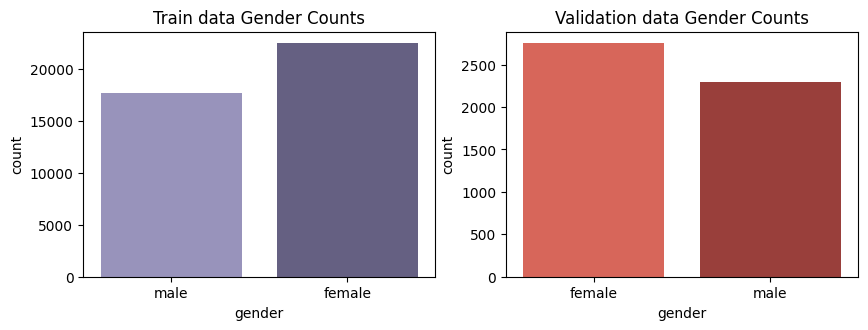

In [5]:
# Gender class

import matplotlib.pyplot as plt

print(tr.gender.value_counts()), print(val.gender.value_counts())

plt.figure(figsize = (10, 7))
plt.subplot(2,2,1)
sns.countplot(x='gender', data=tr, palette='Purples_d')
plt.title('Train data Gender Counts')

plt.subplot(2,2,2)
sns.countplot(x='gender', data=val, palette='Reds_d')
plt.title('Validation data Gender Counts')

plt.show()

device
film       20186
digital    19964
Name: count, dtype: int64
device
film       2536
digital    2514
Name: count, dtype: int64


c:\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


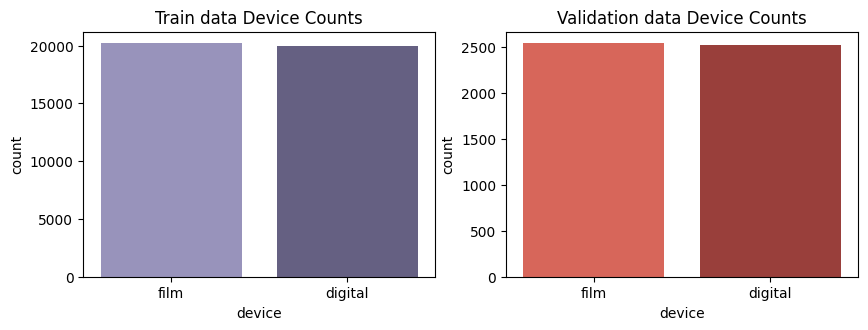

In [6]:
# device class
print(tr.device.value_counts()), print(val.device.value_counts())

plt.figure(figsize = (10, 7))
plt.subplot(2,2,1)
sns.countplot(x='device', data=tr, palette='Purples_d')
plt.title('Train data Device Counts')

plt.subplot(2,2,2)
sns.countplot(x='device', data=val, palette='Reds_d')
plt.title('Validation data Device Counts')

plt.show()

In [7]:
# pictured_year : 촬영나이 + 생년

tr.birth = tr.birth.astype('int')
tr.age_past = tr.age_past.astype('int')
tr['pictured_year'] = tr.birth + tr.age_past   # 사진 찍은 연도

val.birth = val.birth.astype('int')
val.age_past = val.age_past.astype('int')
val['pictured_year'] = val.birth + val.age_past

In [8]:
tr_value_counts = pd.DataFrame(tr.pictured_year.value_counts())
val_value_counts = pd.DataFrame(val.pictured_year.value_counts())

In [9]:
year = pd.concat([tr_value_counts, val_value_counts], axis=1).fillna(int(0))
year.columns=['train', 'val']

In [10]:
year.sort_index()

,train,val
pictured_year,,
1944,1.0,0.0
1945,1.0,0.0
1948,0.0,1.0
1953,2.0,0.0
1956,1.0,1.0
...,...,...
2026,14.0,0.0
2027,11.0,0.0
2028,4.0,0.0


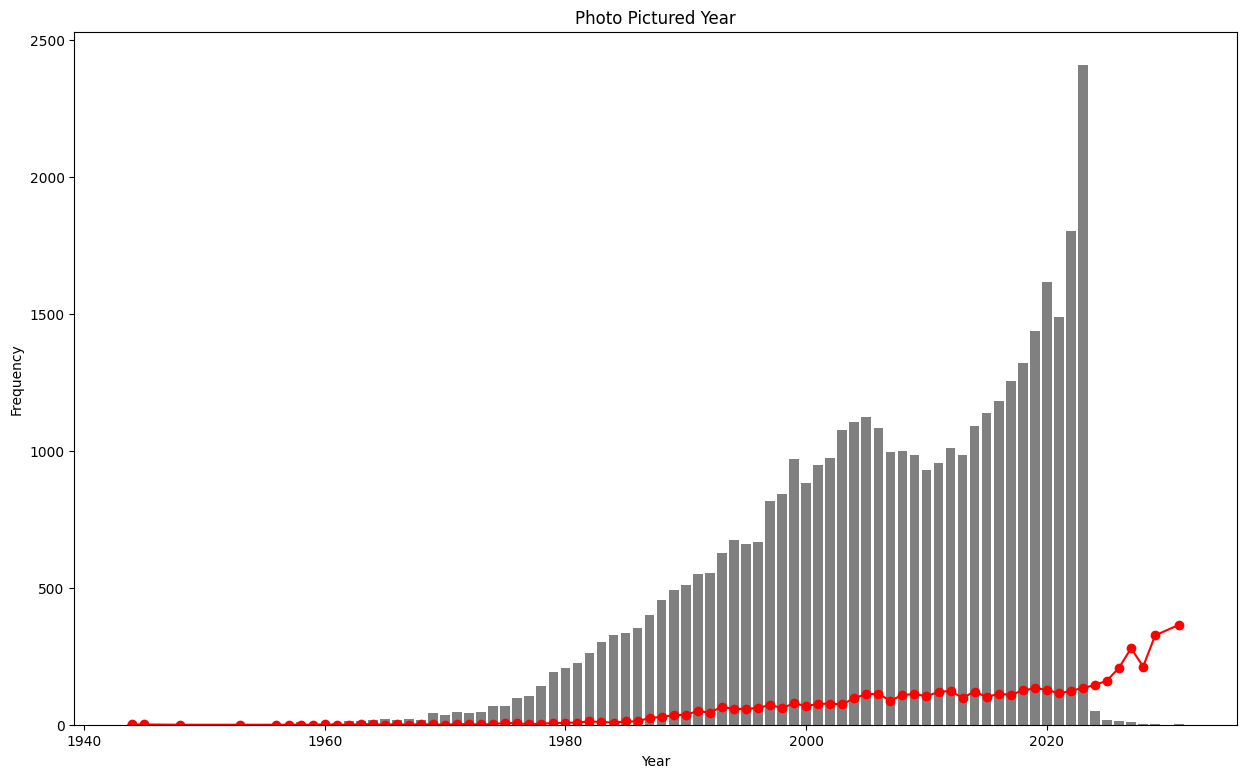

In [11]:
sorted_year = year.sort_index(ascending=False)

# 막대 그래프 그리기
plt.figure(figsize=(15,9))
plt.bar(year.index, year.train, color='gray')
plt.plot(sorted_year.index, year.val, marker='o', color='red')

# 그래프 제목 및 축 레이블 설정
plt.title('Photo Pictured Year')
plt.xlabel('Year')
plt.ylabel('Frequency')

# 그래프 표시
plt.show()

#### 1. [촬영나이 + 출생연도 > 2023년] 인 데이터 제외

In [12]:
len(tr[tr.pictured_year>2023]), len(tr[tr.pictured_year>2023])/len(tr), len(val[val.pictured_year>2023]), len(val[val.pictured_year>2023])/len(val)

(103, 0.0025653798256537984, 7, 0.001386138613861386)

In [13]:
except_tr = tr[tr.pictured_year>2023].filename
except_val = val[val.pictured_year>2023].filename

In [14]:
tr = tr[tr.pictured_year<=2023]
val = val[val.pictured_year<=2023]

len(tr), len(val)

(40047, 5043)

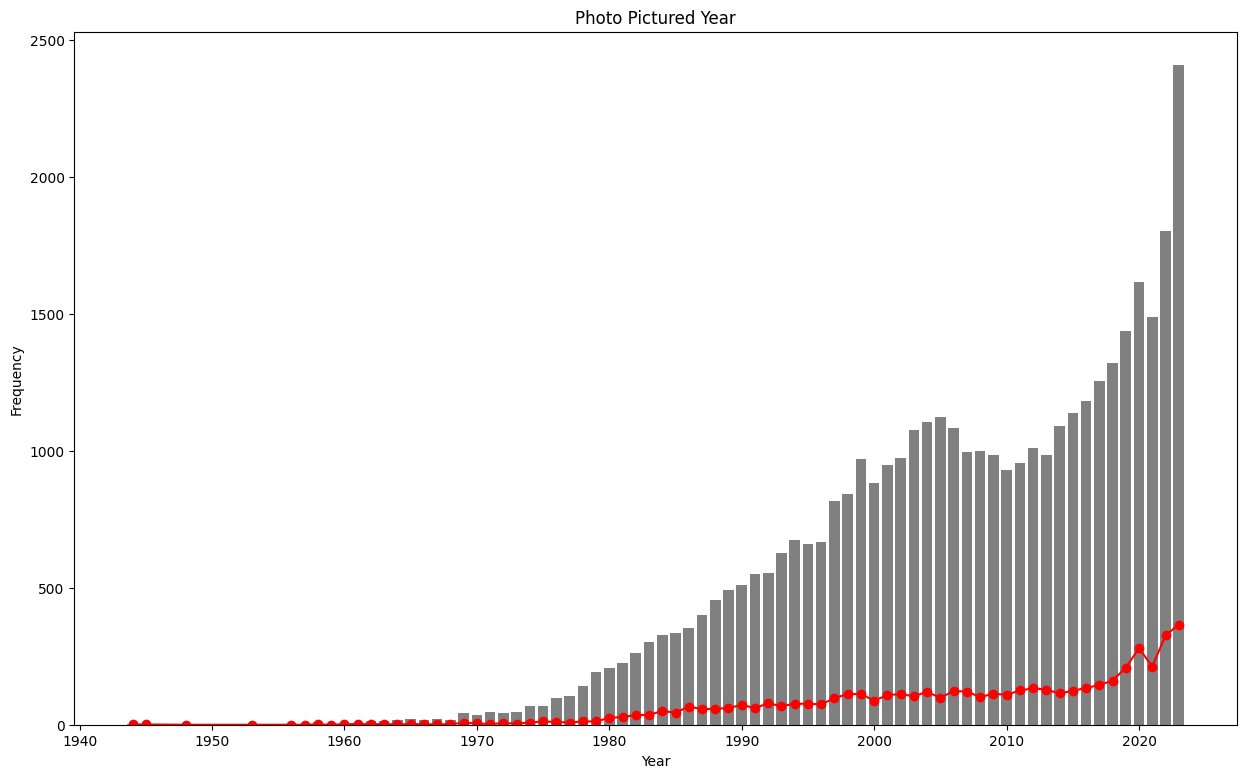

In [15]:
# 그래프 다시 그리기
tr_value_counts = pd.DataFrame(tr.pictured_year.value_counts())
val_value_counts = pd.DataFrame(val.pictured_year.value_counts())

year = pd.concat([tr_value_counts, val_value_counts], axis=1).fillna(int(0))
year.columns=['train', 'val']

sorted_year = year.sort_index(ascending=False)

plt.figure(figsize=(15,9))
plt.bar(year.index, year.train, color='gray')
plt.plot(sorted_year.index, year.val, marker='o', color='red')

# 그래프 제목 및 축 레이블 설정
plt.title('Photo Pictured Year')
plt.xlabel('Year')
plt.ylabel('Frequency')

# 그래프 표시
plt.show()

#### 2. failed_list 제외

In [16]:
# except_list
except_tr = except_tr.to_list()
except_val = except_val.to_list()

except_tr = pd.DataFrame(except_tr)
except_val = pd.DataFrame(except_val)

except_tr.columns = ['list']
except_val.columns = ['list']

In [17]:
# failed_list
path_dir_train = "D:/Ddrive/3rd/git/test/failed_list_train.csv"
path_dir_val = "D:/Ddrive/3rd/git/test/failed_list_val.csv"
list = pd.read_csv(path_dir_train)
list_val = pd.read_csv(path_dir_val)
list.columns = ['list']
list_val.columns = ['list']
list.head()

,list
0,0001_1992_01_00000001_F.jpg
1,0002_1997_05_00000017_F.jpg
2,0002_1997_05_00000019_F.jpg
3,0002_1997_15_00000032_F.jpg
4,0003_1988_10_00000018_F.jpg


In [18]:
# 두 제외 리스트 concat
list_concat = pd.concat([list, except_tr], axis=0)
list_concat = list_concat.apply(lambda x: x.str.replace('jpg','json'))
print(len(list_concat))
list_concat = list_concat.drop_duplicates()   # 중복제거
print(len(list_concat))
list_concat.to_csv("D:/Ddrive/3rd/git/test/failed_list_train_add.csv")

# 두 제외 리스트 concat
list_concat_val = pd.concat([list_val, except_val], axis=0)
list_concat_val = list_concat_val.apply(lambda x: x.str.replace('jpg','json'))
print(len(list_concat_val))
list_concat_val = list_concat_val.drop_duplicates()   # 중복제거
print(len(list_concat_val))
list_concat_val.to_csv("D:/Ddrive/3rd/git/test/failed_list_val_add.csv")


3330
3324
521
520


In [20]:
# 전체 train데이터리스트
tr_list = os.listdir(lbl_train_output_dir)
tr_list = pd.DataFrame(tr_list)
tr_list.columns=['list']
tr_list.head()

,list
0,0001_1992_01_00000001_F.json
1,0001_1992_02_00000002_F.json
2,0001_1992_02_00000003_F.json
3,0001_1992_03_00000004_F.json
4,0001_1992_03_00000005_F.json


In [21]:
# 전체 train_list에서 일부 데이터 제외
final_list = tr_list.merge(list_concat, on='list', how='left', indicator=True).query('_merge == "left_only"').drop('_merge', axis=1)
print(len(final_list))
final_list.to_csv("D:\\Ddrive\\3rd\\git\\test\\final_tr_list_add.csv")

36839


In [22]:
# val데이터리스트
val_list = os.listdir(lbl_val_output_dir)
val_list = pd.DataFrame(val_list)
val_list.columns=['list']
final_list_val = val_list.merge(list_concat_val, on='list', how='left', indicator=True).query('_merge == "left_only"').drop('_merge', axis=1)
print(len(final_list_val))
final_list_val.to_csv("D:\\Ddrive\\3rd\\git\\test\\final_val_list_add.csv")

4571


#### 3. 제외 후 성별 클래스 비교

In [23]:
def label_data_ex(path_dir):
    file_list = os.listdir(path_dir)
    label, gender, birth, age_past, device = [], [], [], [], []
    file_list = final_list
    for filename in file_list.list:
        # 파일 경로
        path = os.path.join(path_dir+'\\'+filename)

        # json 파일 추출
        with open(path, 'r') as label_file:
            label_data = json.load(label_file)        
        # list
        label.append(label_data['age_past'])
        gender.append(label_data['gender'])
        birth.append(label_data['birth'])
        age_past.append(label_data['age_past'])
        device.append(label_data['device'])
        
    return label, gender, birth, age_past, device

In [24]:
train_labels_ex = label_data_ex(lbl_train_output_dir)
tr_ex = pd.DataFrame(train_labels_ex)
tr_ex = tr_ex.T
tr_ex.columns = ['label', 'gender','birth','age_past', 'device']
len(tr_ex), tr_ex.head()

(36839,
   label gender birth age_past device
 0     2   male  1992        2   film
 1     2   male  1992        2   film
 2     3   male  1992        3   film
 3     3   male  1992        3   film
 4     3   male  1992        3   film)

gender
female    20834
male      16005
Name: count, dtype: int64


c:\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Train data without exception Gender Counts')

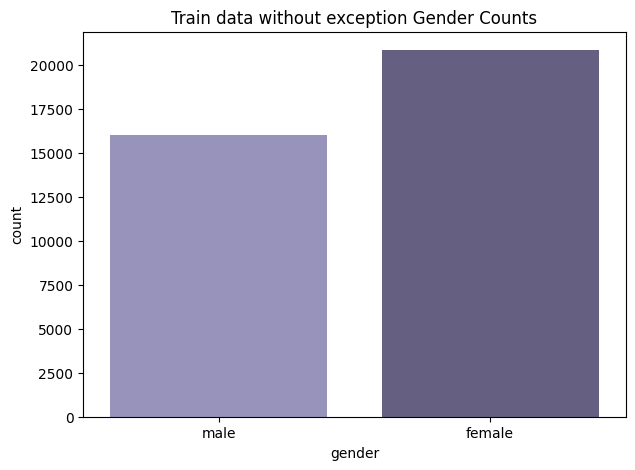

In [25]:
print(tr_ex.gender.value_counts())

plt.figure(figsize = (7, 5))
sns.countplot(x='gender', data=tr_ex, palette='Purples_d')
plt.title('Train data without exception Gender Counts')

#### → 이진분류 시 Undersampling 필요!